SELECT 
    CAST(sex as INT64)AS sex,
    CAST(education_level as INT64)AS education_level,
    CAST(marital_status as INT64)AS marital_status,
    SAFE_CAST(pay_5 as FLOAT64)AS pay_5,
    SAFE_CAST(pay_6 as FLOAT64)AS pay_6,
    CAST(default_payment_next_month as INT64)AS default_payment_next_month,
    limit_balance,
    age,
    pay_0, pay_2, pay_3, pay_4, 
    bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, 
    pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6
FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 7984 1996*4

##1.INTRODUCTION

INTRODUCTION

NAMA : KEVIN NUR KURNIA

PROGRAM :FTDS BATCH 3

OBJECTIVE : Memahami kondisi bisnis dan membuat model Classification untuk memprediksi default_payment_next_month.

PROBLEM STATEMENT :

1. Memahami kondisi bisnis lewat Exploaratory Data Analysis
2. Mencoba berbagai Model evaluasi untuk mendapatkan model classification terbaik
3. Melakukan tuning pada model terbaik agar mendapat hasil model classification terbaik
4. Mmebuat Model Inference

In [ ]:
#Install phik
!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##2.IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
from scipy.stats import uniform
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings(action='ignore')
import phik
from phik.report import plot_correlation_matrix
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import phik
from phik.report import plot_correlation_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

##3.LOAD DATA AND OVERVIEW

In [ ]:
df= pd.read_csv('/content/Untitled Folder/credit_card_ml.csv')

In [ ]:
df.head()

,sex,education_level,marital_status,pay_5,pay_6,default_payment_next_month,limit_balance,age,pay_0,pay_2,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,1,6,1,0.0,0.0,1,80000.0,54.0,0.0,0.0,...,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0
1,1,4,1,0.0,0.0,0,200000.0,49.0,0.0,0.0,...,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0
2,2,6,2,0.0,0.0,1,20000.0,22.0,0.0,0.0,...,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0
3,2,4,2,0.0,0.0,0,260000.0,33.0,0.0,0.0,...,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0
4,1,4,2,0.0,0.0,0,150000.0,32.0,0.0,0.0,...,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0


In [ ]:
df.tail(5)

,sex,education_level,marital_status,pay_5,pay_6,default_payment_next_month,limit_balance,age,pay_0,pay_2,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2960,2,3,2,-2.0,-2.0,0,80000.0,28.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0
2961,2,3,1,-2.0,-2.0,1,50000.0,51.0,-1.0,-1.0,...,5880.0,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0
2962,2,2,1,-2.0,-2.0,1,450000.0,38.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0
2963,2,2,1,-2.0,-2.0,0,50000.0,44.0,-2.0,-2.0,...,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0
2964,2,2,1,-2.0,-2.0,0,290000.0,39.0,1.0,-2.0,...,390.0,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0


In [ ]:
#mengecek jumlah data duplicated
df.duplicated().sum()

1

In [ ]:
df = df.drop_duplicates()

In [ ]:
#mengecek jumlah data duplicated
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2960    False
2961    False
2962    False
2963    False
2964    False
Length: 2964, dtype: bool

In [ ]:
#mengecek tipe data pada kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2964 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sex                         2964 non-null   int64  
 1   education_level             2964 non-null   int64  
 2   marital_status              2964 non-null   int64  
 3   pay_5                       2964 non-null   float64
 4   pay_6                       2964 non-null   float64
 5   default_payment_next_month  2964 non-null   int64  
 6   limit_balance               2964 non-null   float64
 7   age                         2964 non-null   float64
 8   pay_0                       2964 non-null   float64
 9   pay_2                       2964 non-null   float64
 10  pay_3                       2964 non-null   float64
 11  pay_4                       2964 non-null   float64
 12  bill_amt_1                  2964 non-null   float64
 13  bill_amt_2                  2964 

In [ ]:
#mengecek jumlah rows dan kolom pada dataframe
df.shape

(2964, 24)

In [ ]:
#mengecek missing value pada data
df.isnull().sum()

sex                           0
education_level               0
marital_status                0
pay_5                         0
pay_6                         0
default_payment_next_month    0
limit_balance                 0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
dtype: int64

In [ ]:
#membuat variable num_col dan cat_col untuk dipisahkan dan diketahui informasi datanya
num_col = df.describe().columns.tolist()
cat_col = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
#mengetahui isi data kolom numerikal value
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
sex,2964.0,1.607625,0.488362,1.0,1.00,2.0,2.00,2.0
education_level,2964.0,1.849865,0.778159,0.0,1.00,2.0,2.00,6.0
marital_status,2964.0,1.560054,0.522304,0.0,1.00,2.0,2.00,3.0
pay_5,2964.0,-0.224696,1.158739,-2.0,-1.00,0.0,0.00,7.0
pay_6,2964.0,-0.254049,1.167061,-2.0,-1.00,0.0,0.00,7.0
default_payment_next_month,2964.0,0.214238,0.410362,0.0,0.00,0.0,0.00,1.0
limit_balance,2964.0,163356.950067,125049.701016,10000.0,50000.00,140000.0,230000.00,800000.0
age,2964.0,35.193657,9.110949,21.0,28.00,34.0,41.00,69.0
pay_0,2964.0,0.004723,1.114434,-2.0,-1.00,0.0,0.00,8.0
pay_2,2964.0,-0.121795,1.180479,-2.0,-1.00,0.0,0.00,7.0


DATA LOADING OVERVIEW
1. Terdapat 1 buah datat duplikat
2. Tidak terdapat missing value pada data
3. Tipe data sudah sesuai permintaan pada rubrik Kolom sex STRING menjadi INT, education_level	STRING menjadi INT ,marital_status	STRING menjadi INT,pay_5 STRING menjadi FLOAT, pay_6	STRING menjadi FLOAT,default_payment_next_month	menjadi STRING	INT.
4. Terdapat 2964 rows dan 24 kolom
5. Tidak ada tipe kolom type huruf namun ada kolom dengan jumlah unique seperti categorical karena memiliki pattern ordinal seperti sex, marital_status, dan juga educational level


##4.EXPLORATORY DATA ANALYSIS

In [ ]:
#melakukan pengecekan informasi basic pada data
df.describe()

,sex,education_level,marital_status,pay_5,pay_6,default_payment_next_month,limit_balance,age,pay_0,pay_2,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,...,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2.964000e+03,2964.000000,2964.000000,2964.000000,2964.000000
mean,1.607625,1.849865,1.560054,-0.224696,-0.254049,0.214238,163356.950067,35.193657,0.004723,-0.121795,...,48256.032726,44104.558367,40969.898448,39786.491228,6351.044872,6.274611e+03,5152.234818,4562.914980,4914.944332,5384.517544
std,0.488362,0.778159,0.522304,1.158739,1.167061,0.410362,125049.701016,9.110949,1.114434,1.180479,...,68151.445516,61912.600106,58276.878626,57308.498646,20888.933729,2.888432e+04,14289.177313,13283.476236,16736.920951,17278.585006
min,1.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,...,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,50000.000000,28.000000,-1.000000,-1.000000,...,3311.750000,2585.000000,1974.500000,1433.000000,1013.000000,9.975000e+02,479.250000,313.750000,325.250000,175.250000
50%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,140000.000000,34.000000,0.000000,0.000000,...,21549.500000,19895.000000,18819.500000,18511.500000,2238.000000,2.182500e+03,1997.000000,1600.000000,1646.500000,1626.500000
75%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,230000.000000,41.000000,0.000000,0.000000,...,63034.500000,58638.500000,53414.500000,52297.000000,5089.500000,5.000000e+03,4500.000000,4000.250000,4021.000000,4081.750000
max,2.000000,6.000000,3.000000,7.000000,7.000000,1.000000,800000.000000,69.000000,8.000000,7.000000,...,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000


In [ ]:
#mengecek jumlah kolom numerikal
num_col

['sex',
 'education_level',
 'marital_status',
 'pay_5',
 'pay_6',
 'default_payment_next_month',
 'limit_balance',
 'age',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'bill_amt_1',
 'bill_amt_2',
 'bill_amt_3',
 'bill_amt_4',
 'bill_amt_5',
 'bill_amt_6',
 'pay_amt_1',
 'pay_amt_2',
 'pay_amt_3',
 'pay_amt_4',
 'pay_amt_5',
 'pay_amt_6']

- DEFAULT PAYMENT NEXT MONTH TOTAL SUM

Ditemukan pada target prediksi pada data memiliki data yang imbalance hal tersebut dapat mengganggu hasil prediksi. data yang imbalanced berkemungkinan lebih untuk memprediksi kelas yang mayoritas dan memiliki nilai yang kurang pada minority class.

In [ ]:
#List value_counts default_payment_next_month
df['default_payment_next_month'].value_counts()

0    2329
1     635
Name: default_payment_next_month, dtype: int64

<AxesSubplot:>

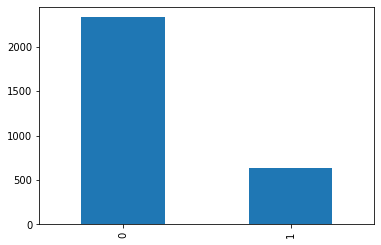

In [ ]:
#Graph Target data pada Target Prediksi menunjukan bahwa data imbalance
df['default_payment_next_month'].value_counts().plot(kind='bar')

- BILL AMOUNT TOTAL SUM 

keterangan =

-bill_amt_1 = september

-bill_amt_2 = agustus

-bill_amt_3 = juli

-bill_amt_4 = juni

-bill_amt_5 = may

-bill_amt_6 = april

Mengetahui jumlah bill_amt dari terbanyak hingga terendah terdapat pada kolom bill_amt_1 dan secara berurutan ke bill_amt_6.

Terdapat juga High Multicolinearity pada data namun kita akan membiarkanya karena kita akan membutuhkannya untuk feature selection karena feature tersebut memiliki korelasi yang tinggi terhadap target prediksi. Bill_amt_1 memiliki nilai vif yang tinggi meskipun memiliki nilai vif yang tinggi tidak perlu kita drop karena model yang kita gunakan tidak linear tidak terganggu oleh multicolinearity.

In [ ]:
#List value_counts default_payment_next_month
df[['bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6']].sum()

bill_amt_1    154530775.0
bill_amt_2    150174739.0
bill_amt_3    143030881.0
bill_amt_4    130725911.0
bill_amt_5    121434779.0
bill_amt_6    117927160.0
dtype: float64

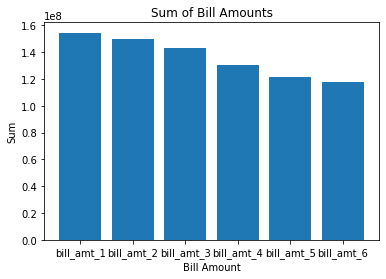

In [ ]:
#membuat sum dari masing - masing kolom bill_amt
bill_amts_sum = df[['bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6']].sum()

# sort the sum of the bill amount columns in descending order
bill_amts_sum = bill_amts_sum.sort_values(ascending=False)

# create bar chart
plt.bar(bill_amts_sum.index, bill_amts_sum.values)
plt.xlabel('Bill Amount')
plt.ylabel('Sum')
plt.title('Sum of Bill Amounts')
plt.show()

In [ ]:
#melakukan pengecekan pada multicolinearity
df_vif = df[['bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6']]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
vif["features"] = df_vif.columns
vif.round(1)

,VIF Factor,features
0,13.6,bill_amt_1
1,24.0,bill_amt_2
2,18.7,bill_amt_3
3,22.0,bill_amt_4
4,24.0,bill_amt_5
5,13.1,bill_amt_6


- TOTAL SUM PAY AMOUNT

Keterangan =

-pay_amt_1 = september

-pay_amt_2 = agustus

-pay_amt_3 = juli

-pay_amt_4 = juni

-pay_amt_5 = may

-pay_amt_6 = april


SUM Pay_amt adalah pembayaran yang dilakukan oleh nasabah paling banyak 

pembayaran dilakukan pada pay_amt_1 dan pay_amt_2 bulan terbanyak Agustus dan September.

Ditemukan bahwa data memiliki nilai vif yang rendah. 

In [ ]:
 #list value sum pay_amt 1 - 6
 df[['pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6']].sum().sort_values(ascending=False)


pay_amt_1    18824497.0
pay_amt_2    18597946.0
pay_amt_6    15959710.0
pay_amt_3    15271224.0
pay_amt_5    14567895.0
pay_amt_4    13524480.0
dtype: float64

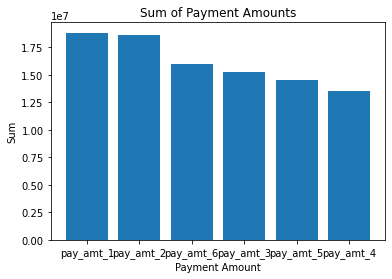

In [ ]:
# Membuat sum masing - masing kolom pay_amt
pay_amts_sum = df[['pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6']].sum().sort_values(ascending=False)

# create bar chart
plt.bar(pay_amts_sum.index, pay_amts_sum.values)
plt.xlabel('Payment Amount')
plt.ylabel('Sum')
plt.title('Sum of Payment Amounts')
plt.show()

In [ ]:
df_vif = df[['pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6']]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
vif["features"] = df_vif.columns
vif.round(1)

,VIF Factor,features
0,1.4,pay_amt_1
1,1.3,pay_amt_2
2,1.3,pay_amt_3
3,1.1,pay_amt_4
4,1.1,pay_amt_5
5,1.1,pay_amt_6


- TOTAL VALUE_COUNTS SEX

Keterangan = 1 : Male dan 2 : Female

Mayoritas Sex ada di nomer 2 yang artinya nasabah terbanyak adalah perempuan

In [ ]:
#List value_count pada kolom sex
df['sex'].value_counts()

2    1801
1    1163
Name: sex, dtype: int64

<AxesSubplot:>

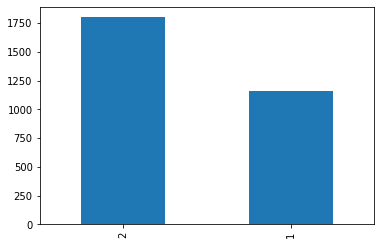

In [ ]:
#membuat graph sum dari sex
df['sex'].value_counts().plot(kind='bar')

EDUCATIONAL LEVEL VS DEFAULT PAYMENT GRAPH

Mengetahui kecendrungan educational_level yang tidak melakukan pembayaran ternyata education tingkat 2 memiliki kecendrungan untuk tidak melakukan pembayaran terlihat semakin tinggi education_level semakin mampu nasabah. data tersebut ikut mengikuti jumlah count data yang menyebutkan educational level 2 jumlah datanya paling banyak.

In [ ]:
df.groupby('education_level')[['default_payment_next_month']].count().sort_values('default_payment_next_month',ascending = False)

,default_payment_next_month
education_level,
2,1400
1,1038
3,483
5,24
4,13
6,4
0,2


In [ ]:
##list value sum default_payment_next_month pada education_level
df.groupby('education_level')[['default_payment_next_month']].sum().sort_values('default_payment_next_month',ascending = False)

,default_payment_next_month
education_level,
2,342
1,177
3,113
6,2
5,1
0,0
4,0


<AxesSubplot:xlabel='education_level'>

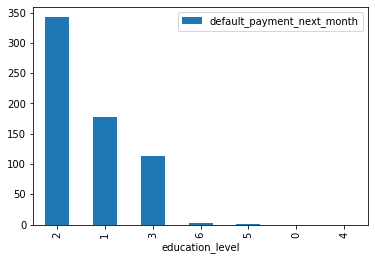

In [ ]:
#membuat graph educational_level sum dari default_payment_next_month
df.groupby('education_level')[['default_payment_next_month']].sum().sort_values('default_payment_next_month',ascending = False).plot(kind='bar')

- MARITAL STATUS VS SUM OF DEFAULT_PAYMENT_NEXT_MONTH

keterangan= 
-1=Married

-2=Single

-3=others 

-0=unknown 

data menunjukan kecendrungan bahwa Single memiliki kemungkinan lebih tinggi untuk tidak membayar dibandingkan dengan yang sudah menikah

In [ ]:
#list value count default_payment_next_month pada marital status
df.groupby('marital_status')[['default_payment_next_month']].count().sort_values('default_payment_next_month',ascending = False)

,default_payment_next_month
marital_status,
2,1594
1,1331
3,35
0,4


<AxesSubplot:xlabel='marital_status'>

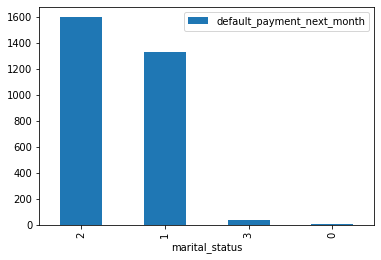

In [ ]:
#Graph jumlah count deafult_payment_next_month pada marital status
df.groupby('marital_status')[['default_payment_next_month']].count().sort_values('default_payment_next_month',ascending = False).plot(kind='bar')

In [ ]:
#list value sum default_payment_next_month pada marital status
df.groupby('marital_status')[['default_payment_next_month']].sum().sort_values('default_payment_next_month',ascending = False)

,default_payment_next_month
marital_status,
2,327
1,302
3,6
0,0


<AxesSubplot:xlabel='marital_status'>

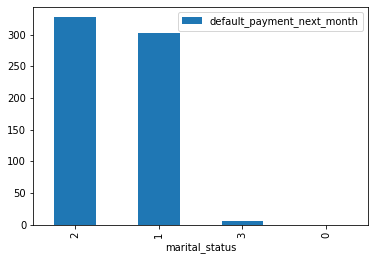

In [ ]:
#Graph jumlah deafult_payment_next_month pada marital status
df.groupby('marital_status')[['default_payment_next_month']].sum().sort_values('default_payment_next_month',ascending = False).plot(kind='bar')

- AGE_GROUP VS SUM OF DEFAULT_PAYMENT_NEXT_MONTH

Data menunjukan bahwa mayoritas sum umur 20 dan 30 paling banyak menunggak hal tersebut sejalan dengan jumlah datanya secara count umur 20 dan 30 berada diposisi 1 dan 2 begitu juga dengan jumlah tunggakannya. 

In [ ]:
#membuat bins data
bins = [20, 30, 40, 50, 60, 70]
labels = ['20s', '30s', '40s', '50s', '60s']

# Cut dataframe kolom 'age' ke dalam bins
df['age_group'] = pd.cut(df['age'], bins, labels=labels)

In [ ]:
#list age_group terhadap count default payment
df.groupby('age_group')[['default_payment_next_month']].count().sort_values('default_payment_next_month',ascending = False)

,default_payment_next_month
age_group,
20s,1132
30s,1049
40s,567
50s,187
60s,29


<AxesSubplot:ylabel='age_group'>

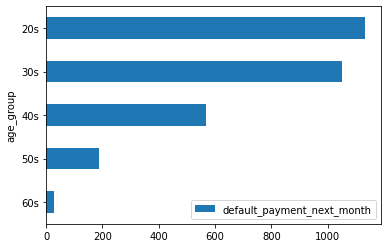

In [ ]:
#graph age_group terhadap count default_payment_next_month
df.groupby('age_group')[['default_payment_next_month']].count().sort_values('default_payment_next_month',ascending = True).plot(kind='barh')

In [ ]:
#list data age group terhadap sum default_payment_next_month
df.groupby('age_group')[['default_payment_next_month']].sum().sort_values('default_payment_next_month',ascending = False)

,default_payment_next_month
age_group,
20s,239
30s,213
40s,136
50s,41
60s,6


<AxesSubplot:ylabel='age_group'>

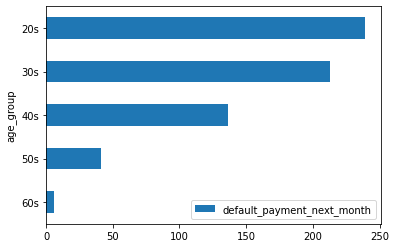

In [ ]:
#graph data age group terhadap sum default_payment_next_month
df.groupby('age_group')[['default_payment_next_month']].sum().sort_values('default_payment_next_month',ascending = True).plot(kind='barh')

- Age Group and Total Count of default_payment_next_month 

Data menunujukan bahwa presentase tidak mampu bayar terdapat pada umur 40 tahun sebesar 23% dan umur paling mampu bayar ada di umur 30 tahun sebanyak 79%.

In [ ]:
age_default_counts = df.groupby(['age_group', 'default_payment_next_month']).size().reset_index(name='counts')

# calculate the total number of observations in each age group
age_group_counts = df.groupby('age_group').size()

# divide the count of defaults and non-defaults for each age group by the total number of observations in that age group
age_default_counts['percentage'] = (age_default_counts.groupby('age_group')['counts'].apply(lambda x: x/x.sum()))*100

age_default_counts

,age_group,default_payment_next_month,counts,percentage
0,20s,0,893,78.886926
1,20s,1,239,21.113074
2,30s,0,836,79.694948
3,30s,1,213,20.305052
4,40s,0,431,76.014109
5,40s,1,136,23.985891
6,50s,0,146,78.074866
7,50s,1,41,21.925134
8,60s,0,23,79.310345
9,60s,1,6,20.689655


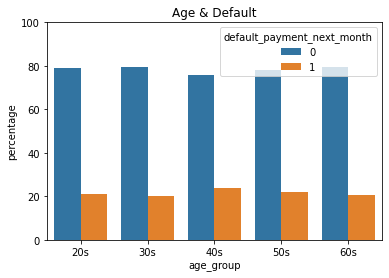

In [ ]:
sns.barplot(x='age_group', y='percentage', hue='default_payment_next_month', data=age_default_counts)
plt.title('Age & Default')
plt.ylim(0, 100)
plt.show()

#EDA OVERVIEW

- Target Data menunjukan bahwa target data mengalami imbalance hal tersebut dapat mempengaruhi hasil prediksi yang dimana hasil prediksi akan lebih condong ke hasil mayoritas data.
- Mengetahui jumlah bill_amt dari terbanyak hingga terendah. Terbanyak terdapat pada bill_amt_1 dan secara berurutan ke bill_amt_6.Dan Terdapat High Multicolinearity pada data. Bill_amt_1 memiliki nilai vif yang tinggi meskipun memiliki nilai vif yang tinggi tidak perlu kita drop karena model yang kita gunakan tidak linear tidak terganggu oleh multicolinearity.
- pembayaran dilakukan pada pay_amt_1 dan pay_amt_2 bulan terbanyak Agustus dan September. Ditemukan bahwa data memiliki nilai vif yang rendah.
- Mengetahui kecendrungan kelas yang tidak melakukan pembayaran ternyata education tingkat 2 memiliki kecendrungan untuk tidak melakukan pembayaran terlihat semakin tinggi education_level semakin mampu nasabah. data tersebut ikut mengikuti jumlah count data yang menyebutkan educational level 2 jumlah datanya paling banyak.
- Mayoritas Sex ada di nomer 2 yang artinya nasabah terbanyak adalah perempuan
- data menunjukan kecendrungan bahwa Single memiliki kemungkinan lebih tinggi untuk tidak membayar dibandingkan dengan yang sudah menikah
- Data menunjukan bahwa mayoritas sum umur 20 dan 30 paling banyak menunggak hal tersebut sejalan dengan jumlah datanya secara count umur 20 dan 30 berada diposisi 1 dan 2 begitu juga dengan jumlah tunggakannya.
-  Data menunujukan bahwa presentase tidak mampu bayar terdapat pada umur 40 tahun sebesar 23% dan umur paling mampu bayar ada di umur 30 tahun sebanyak 79%. 

#5.FEATURE SELECTION

Install Phik mengaktivasi phik guna mencari korelasi antar fitur untuk digunakan pada model

In [ ]:
#Install phik
!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Membuat variable baru untuk masukan pada plot corelation matrix

In [ ]:
#Buat variabel baru Phik_overview
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['sex', 'education_level', 'marital_status', 'pay_5', 'pay_6', 'default_payment_next_month', 'limit_balance', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']


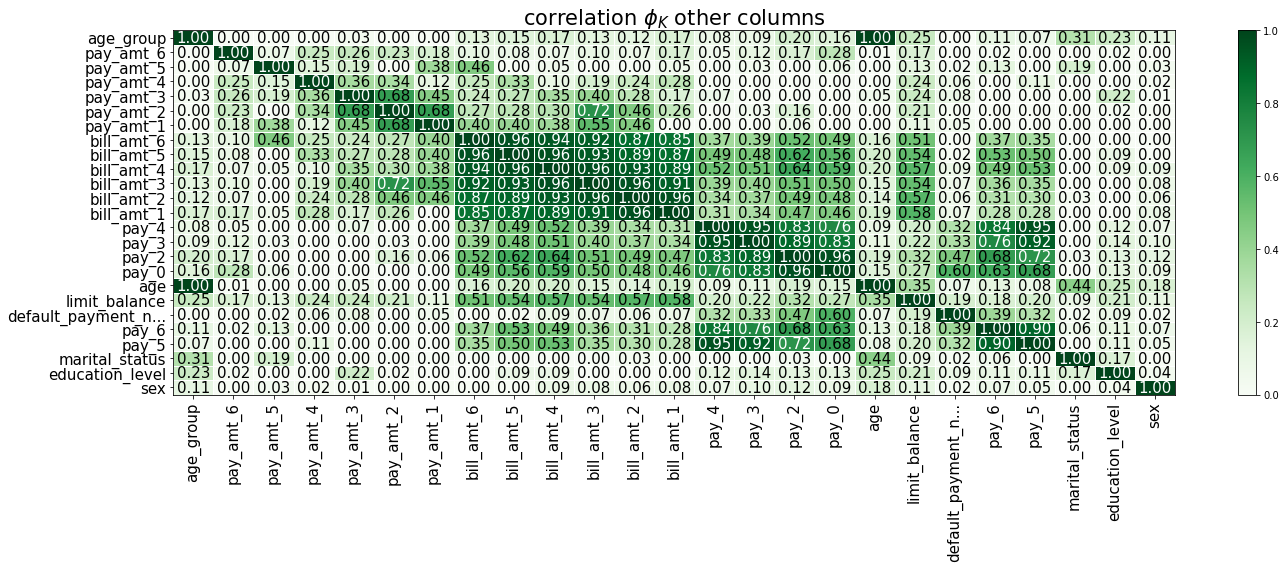

In [ ]:
#Aktivasi Matrix phik_matrix
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$ other columns", 
                        fontsize_factor=1.5, 
                        figsize=(20,8))
plt.tight_layout()

In [ ]:
#phik_overview sebagai DataFrame
phik_overview

,sex,education_level,marital_status,pay_5,pay_6,default_payment_next_month,limit_balance,age,pay_0,pay_2,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,age_group
sex,1.000000,0.039061,0.000000,0.047309,0.068282,0.015281,0.114489,0.180424,0.088779,0.122564,...,0.086533,0.000000,0.000000,0.000000,0.000000,0.011429,0.018747,0.034574,0.000000,0.109672
education_level,0.039061,1.000000,0.167096,0.111444,0.107059,0.085359,0.205667,0.246589,0.127597,0.130980,...,0.088519,0.086455,0.000000,0.000000,0.017047,0.217294,0.000000,0.000000,0.023591,0.228845
marital_status,0.000000,0.167096,1.000000,0.000000,0.058098,0.020055,0.086512,0.437104,0.000000,0.032285,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.191582,0.000000,0.314770
pay_5,0.047309,0.111444,0.000000,1.000000,0.897319,0.315415,0.196312,0.082635,0.678764,0.715982,...,0.525176,0.499403,0.352605,0.000000,0.000000,0.000000,0.105499,0.000000,0.000000,0.068441
pay_6,0.068282,0.107059,0.058098,0.897319,1.000000,0.386559,0.177949,0.125095,0.633896,0.683647,...,0.487028,0.525606,0.374512,0.000000,0.000000,0.000000,0.000000,0.132357,0.023289,0.109839
default_payment_next_month,0.015281,0.085359,0.020055,0.315415,0.386559,1.000000,0.191907,0.067038,0.596572,0.468335,...,0.087360,0.019495,0.000000,0.046866,0.004992,0.083774,0.062588,0.022282,0.000000,0.000000
limit_balance,0.114489,0.205667,0.086512,0.196312,0.177949,0.191907,1.000000,0.354603,0.268362,0.316312,...,0.570110,0.539768,0.511438,0.107777,0.214728,0.243217,0.235536,0.132039,0.173959,0.251641
age,0.180424,0.246589,0.437104,0.082635,0.125095,0.067038,0.354603,1.000000,0.152834,0.186834,...,0.195098,0.200810,0.164806,0.000000,0.000000,0.048942,0.000000,0.000000,0.008340,0.998731
pay_0,0.088779,0.127597,0.000000,0.678764,0.633896,0.596572,0.268362,0.152834,1.000000,0.963696,...,0.588473,0.562617,0.491670,0.000000,0.000000,0.000000,0.000000,0.057493,0.279799,0.155961
pay_2,0.122564,0.130980,0.032285,0.715982,0.683647,0.468335,0.316312,0.186834,0.963696,1.000000,...,0.642030,0.618432,0.520657,0.064681,0.156303,0.000000,0.000000,0.000000,0.173843,0.197996


In [ ]:
# Buat Variable Corr_matrix
corr_matrix = phik_overview

# Seleksi korelasi target kolom 'income_bracket' dengan semua kolom
income_corr = corr_matrix['default_payment_next_month']

# sort values
sorted_income_corr = income_corr.sort_values(ascending=False)

# print correlation matrix
print(sorted_income_corr)

default_payment_next_month    1.000000
pay_0                         0.596572
pay_2                         0.468335
pay_6                         0.386559
pay_3                         0.334726
pay_4                         0.318688
pay_5                         0.315415
limit_balance                 0.191907
bill_amt_4                    0.087360
education_level               0.085359
pay_amt_3                     0.083774
bill_amt_1                    0.073974
bill_amt_3                    0.073073
age                           0.067038
bill_amt_2                    0.064086
pay_amt_4                     0.062588
pay_amt_1                     0.046866
pay_amt_5                     0.022282
marital_status                0.020055
bill_amt_5                    0.019495
sex                           0.015281
pay_amt_2                     0.004992
bill_amt_6                    0.000000
pay_amt_6                     0.000000
age_group                     0.000000
Name: default_payment_nex

Saya berencana mengambil korelasi dengan nilai 0.02 keatas 

Feature Selection :

1. pay_0,
2. pay_2,
3. pay_6,
4. pay_3,
5. pay_4,
6. pay_5,
7. limit_balance,
8. bill_amt_4,
9. education_level,
10. age,
11. bill_amt_2
12. pay_amt_4
13. pay_amt_1
14. pay_amt_5
15. marital_status

numerik : pay_0,pay_2,pay_6,pay_3,pay_4,pay_5,limit_balance,bill_amt_4,age,bill_amt_2,pay_amt_4,pay_amt_1,pay_amt_5

kategorikal:education_level,marital_status

Target: income_bracket

In [ ]:
# Mendefinisikan Feature dan Target
feature =['pay_0','pay_2','pay_6','pay_3','pay_4','pay_5','limit_balance','bill_amt_4','education_level','age','bill_amt_2','pay_amt_4','pay_amt_1','pay_amt_5','marital_status']
target = ['default_payment_next_month']

In [ ]:
# Mendifinisikan variable x dan y dengan feature dan target
X = df[feature]
y = df[target]

In [ ]:
# Mendefinisikan variable kolom Numerical dan Kolom Kategori 
num_col =['pay_0','pay_2','pay_6','pay_3','pay_4','pay_5','limit_balance','bill_amt_4','age','bill_amt_2','pay_amt_4','pay_amt_1','pay_amt_5','bill_amt_5']
cat_col = ['education_level','marital_status','default_payment_next_month']

In [ ]:
#melakukan kombinasi kolom antara number column dan categorical column
df_features = df[num_col+cat_col] 
df_features

,pay_0,pay_2,pay_6,pay_3,pay_4,pay_5,limit_balance,bill_amt_4,age,bill_amt_2,pay_amt_4,pay_amt_1,pay_amt_5,bill_amt_5,education_level,marital_status,default_payment_next_month
0,0.0,0.0,0.0,0.0,0.0,0.0,80000.0,29296.0,54.0,61808.0,2232.0,2545.0,542.0,26210.0,6,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,200000.0,50146.0,49.0,49599.0,3480.0,1689.0,2500.0,50235.0,4,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,20000.0,1434.0,22.0,19420.0,0.0,4641.0,1500.0,500.0,6,2,1
3,0.0,0.0,0.0,0.0,0.0,0.0,260000.0,27821.0,33.0,22815.0,5000.0,5000.0,1085.0,30767.0,4,2,0
4,0.0,0.0,0.0,0.0,-1.0,0.0,150000.0,150464.0,32.0,68686.0,4600.0,4019.0,4709.0,143375.0,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,-1.0,-1.0,-2.0,-1.0,-2.0,-2.0,80000.0,0.0,28.0,2800.0,0.0,2800.0,0.0,0.0,3,2,0
2961,-1.0,-1.0,-2.0,-1.0,-1.0,-2.0,50000.0,0.0,51.0,300.0,0.0,300.0,0.0,0.0,3,1,1
2962,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,450000.0,390.0,38.0,390.0,390.0,390.0,390.0,390.0,2,1,1
2963,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,50000.0,390.0,44.0,390.0,390.0,390.0,0.0,390.0,2,1,0


#6.PREPROCESSING

- Datanya kita split menjadi Traning dan Test. Training set di gunakan untuk melatih model sedangkan test set digunakan untuk mengevaluasi performance  model yang sudah di trained.

- default_payment_next_month kita drop karena kita akan memprediksi hasil kolom tersebut

In [ ]:
# Melakukan Split Data menjadi Test dan Train
X = df_features.drop('default_payment_next_month', axis=1)
y = df_features['default_payment_next_month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,stratify=y)

- Membuat df_eda hasil dari concat X_train dan y train untuk dilakukan proses training lalu mengecek jumlah kolom dan rows untuk memastikan jumlah data

In [ ]:
# for EDA model creation we will use dataframe stored in df_eda
df_eda = pd.concat([X_train, y_train], axis=1)

df_eda.shape

(2074, 17)

Mengecek isi data pada kolom fitur

In [ ]:
#cek dataframe
df_eda.head(5)

,pay_0,pay_2,pay_6,pay_3,pay_4,pay_5,limit_balance,bill_amt_4,age,bill_amt_2,pay_amt_4,pay_amt_1,pay_amt_5,bill_amt_5,education_level,marital_status,default_payment_next_month
2658,-1.0,-1.0,-2.0,-2.0,-2.0,-2.0,320000.0,2621.0,44.0,28785.0,9075.0,28791.0,6564.0,9075.0,2,2,0
877,0.0,0.0,0.0,0.0,0.0,0.0,140000.0,57609.0,32.0,99470.0,3000.0,5000.0,2500.0,59526.0,2,2,0
1061,1.0,2.0,0.0,0.0,0.0,0.0,150000.0,129115.0,32.0,124835.0,3557.0,0.0,5929.0,131820.0,2,2,1
1015,2.0,2.0,0.0,0.0,0.0,0.0,20000.0,19459.0,45.0,20043.0,3000.0,11.0,1203.0,36290.0,2,1,1
2113,3.0,2.0,-1.0,2.0,0.0,-1.0,30000.0,1630.0,42.0,3048.0,12037.0,1000.0,1100.0,12037.0,2,2,1


In [ ]:
#mengecek nilai rows dan kolom
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(2074, 16)
(890, 16)
(2074,)
(890,)


In [ ]:
#mengecek nilai skewness dan kurtosis untuk mendeteksi outlier
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df[col].skew() > 0.5 and df[col].skew() <= 1 :
        print("Columns '{}' right moderately skewed".format(col))
    elif df[col].skew() > 1:
        print("Columns '{}' right highly skewed".format(col))
    elif df[col].skew() < -0.5 and df[col].skew() >= -1 :
        print("Columns '{}' left moderately skewed".format(col))
    elif df[col].skew() < -1:
        print("Columns '{}' left highly skewed".format(col))

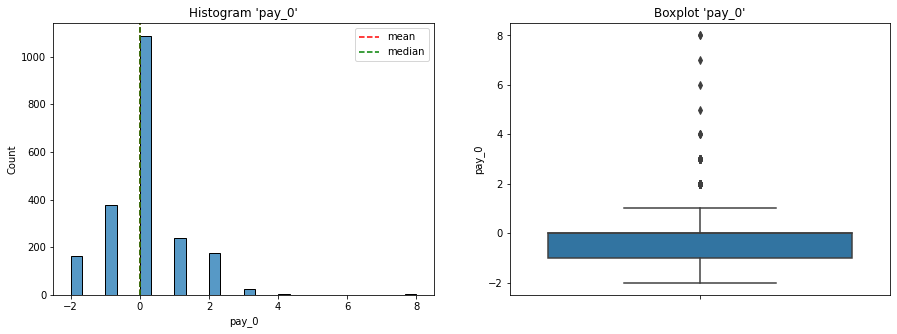

pay_0 Kurtosis: 4.252201332363641
pay_0 Skewness: 0.9226888262130895
Columns 'pay_0' right moderately skewed


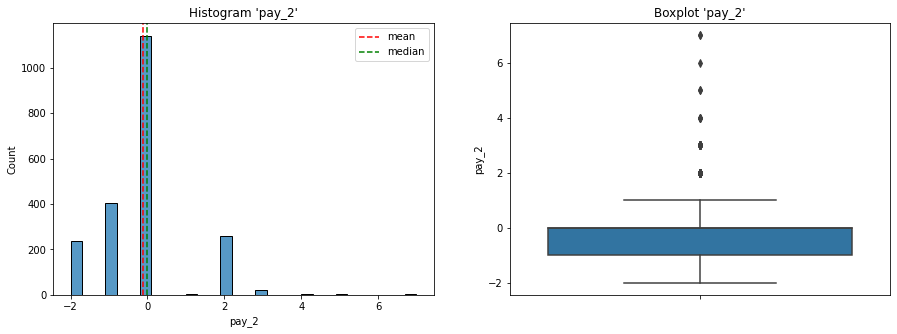

pay_2 Kurtosis: 2.1355054574235854
pay_2 Skewness: 0.8468737984662285
Columns 'pay_2' right moderately skewed


In [ ]:
#grafik outlier
for i in [0,1]:
  plot_dist(X_train,feature[i])

Melakukan deteksi Outlier menggunakan IQR karena distribusi data atau nilai skewness tidak normal batasan normal nilai skewness adalah -0.5 sampai 0.5

In [ ]:
# deteksi outlier dengan IQR
Q3 = X_train['pay_0'].quantile(.75)
Q1 = X_train['pay_0'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = X_train[(X_train['pay_0'] > upper) | (X_train['pay_0'] < lower)]

print('count of outlier: ', outlier.shape[0])

print('percentage of outlier: ', outlier.shape[0]/X_train.shape[0] * 100, '%')

count of outlier:  205
percentage of outlier:  9.884281581485054 %


In [ ]:
# deteksi outlier dengan IQR
Q3 = X_train['pay_2'].quantile(.75)
Q1 = X_train['pay_2'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = X_train[(X_train['pay_2'] > upper) | (X_train['pay_2'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/X_train.shape[0] * 100, '%')

count of outlier:  291
percentage of outlier:  14.030858244937319 %


- Hasil jumlah nilai outlier cukup banyak saya rasa tidak baik kalau kita trim karena datanya sudah terlalu sedikit maka dari itu saya memutuskan untuk melakukan winsorizer.

In [ ]:
#install pip untuk wisorizor
!pip install feature_engine
from feature_engine.outliers import Winsorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 KB 9.6 MB/s eta 0:00:00


In [ ]:
#Melakukan Winsorizer pada kolom pay_2
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['pay_2'])

X_train = wins.fit_transform(df_eda)

In [ ]:
wins = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['Temprature'])

X_train = wins.fit_transform(X_train_eda)
X_train_eda.describe()

NameError: ignored

In [ ]:
#Melakukan Winsorizer pada kolom pay_0
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['pay_0'])

X_train = wins.fit_transform(df_eda)

##**6.1.NUMERICAL FEATURE**

In [ ]:
#Mengetahui kolom numerik fitur
df_eda[num_col].head()

In [ ]:
#mengecek kolom numerical
num_col

In [ ]:
#melakukan MinMaxscaler()
mm_scaler= MinMaxScaler()
X_train_scaler= mm_scaler.fit_transform(X_train[num_col])
X_train_scaler

In [ ]:
#mengecek jumlah kolom dan row
X_train.shape

In [ ]:
# melakukan proses scaling pada kolom numerik x test fit 
X_test_scaler= mm_scaler.transform(X_test[num_col])
X_test_scaler

##**6.2.CATEGORICAL FEATURE**

- Melakukan perubahan data kaegorik menjadi nilai angka dari string menjadi number supaya dapat dibaca dilakukan skala.

In [ ]:
X_train

In [ ]:
#mengecek kolom kategorikal
cat_col

- Terdapat 2 jenis tipe kategorikal pada data ordinal dan nominal

- Tipe Ordinal ada di fitur educational level isi datanya sudah ordinal maka  dari itu tidak perlu saya encode

- Tipe Nominal ada di fitur marital_status isi datanya akan saya encode menggunaka One Hot Encoder



Fitur Education_level adalah Kolom Kategorical Ordinal

In [ ]:
cat_col_ord = ['education_level']


Fitur Marital_Status adalah Kolom Kategorical Nominal

In [ ]:
cat_col_ohe = ['marital_status']

In [ ]:
#remove kolom income bracket karena tidak dibutuhkan
cat_col.remove('default_payment_next_month')

In [ ]:
#Merubah data ordinal menjadi 1 dimensi array
X_train_ord = np.array([X_train['education_level']]).T
X_test_ord = np.array([X_test['education_level']]).T

In [ ]:
X_test_ord

In [ ]:
#cek kolom dan rows data X_train_ord
X_train_ord.shape

In [ ]:
#melakukan perubahan data kategorical tipe nominal pada kolom kategorikal menggunakan One Hot Encoding pada data X_train
enc= OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encode= enc.fit_transform(X_train[cat_col_ohe])
X_train_encode

In [ ]:
#melakukan perubahan data kategorical tipe nominal pada kolom kategorikal menggunakan One Hot Encoding pada data X_test
X_test_encode= enc.transform(X_test[cat_col_ohe])
X_test_encode

#7.MODEL DEFINITION

In [ ]:
#Melakukan kombinasi di xtrain menggunakan concat antara data numerik yang sudah di scal dan categorical yang sudah di encode
X_train_fix= np.concatenate([X_train_scaler, X_train_encode, X_train_ord], axis=1)
X_train_fix

In [ ]:
#Melakukan kombinasi di xtest menggunakan concat antara data numerik yang sudah di scal dan categorical yang sudah di encode
X_test_fix= np.concatenate([X_test_scaler, X_test_encode,X_test_ord], axis=1)
X_test_fix

In [ ]:
X_train.columns

In [ ]:
X_test.columns

##7.MODEL TRAINING

In [ ]:
#melakukan model training dan pembuatan variable pada pada model evaluasi
logreg = LogisticRegression(random_state=0)
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
svc = SVC(random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)
nb = GaussianNB()
xgb = XGBClassifier(n_estimators=10, learning_rate=0.1, max_depth=1, random_state=0)

#8.MODEL EVALUASI

Target Model Yang ingin kita cari adalah yang memberikan nilai recall tertinggi
Berikut alasan penjelasannya :

Default_payment= 1:true 0:false 1= tidak bayar 0=bayar
p 0 a 1  diprediksi mampu bayar padhal tidak mampu bayar
false negatif

p 1 a 1
true positive

p 1 a 0 diprediksi ti
false positif

p 0 a 0
true negatif

Semakin tinggi recall semakin sedikit false negatif yang dihasilkan oleh model
semakin tinggi precision semakin sedikit false positif yang dihsilkan oleh model

Maka dari itu kita berupaya menaikan recall supaya prediksi 
mampu bayar padahal tidak mampu bayar tidak terjadi
.

##8.1.LOGISTIC REGRESSION EVALUATION

Logistic regression adalah algoritma untuk memprediksi berdasarkan independet variables.

In [ ]:
logreg.fit(X_train_fix, y_train)

lr_train = logreg.predict(X_train_fix)
lr_test = logreg.predict(X_test_fix)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))

##8.2.SVC MODEL EVALUATION

Support Vector Machines (SVM) adalah metode Supervised learning yang banyak digunakan dan dapat digunakan untuk masalah regresi, klasifikasi, deteksi anomali. Classier berbasis SVM disebut SVC (Support Vector Classifier) dan kita dapat menggunakannya dalam masalah klasifikasi. Ini menggunakan parameter regularisasi C untuk mengoptimalkan margin di hyperplane dan juga disebut C-SVC.

In [ ]:
svc.fit(X_train_fix, y_train)

svc_train = svc.predict(X_train_fix)
svc_test = svc.predict(X_test_fix)

print(classification_report(y_train, svc_train))
print(classification_report(y_test, svc_test))

##8.3. DECISION TREE MODEL CLASSIFICATION

Decision Tree adalah struktur seperti pohon diagram alur, di mana setiap simpul internal menunjukkan pengujian pada atribut, setiap cabang mewakili hasil pengujian, dan setiap simpul daun (node terminal) memegang label kelas

In [ ]:
dtc.fit(X_train_fix, y_train)

dtc_train = dtc.predict(X_train_fix)
dtc_test = dtc.predict(X_test_fix)

print(classification_report(y_train, dtc_train))
print(classification_report(y_test, dtc_test))

##8.4.RANDOM FOREST CLASSIFICATION MODEL

Random Forest adalah algoritma klasifikasi yang terdiri dari decision tree.  menggunakan bagging dan future randomness ketika membangun setiap pohon individu untuk mencoba membuat hutan pohon yang tidak berkorelasi.

In [ ]:
rfc.fit(X_train_fix, y_train)

rfc_train = rfc.predict(X_train_fix)
rfc_test = rfc.predict(X_test_fix)

print(classification_report(y_train, rfc_train))
print(classification_report(y_test, rfc_test))

##8.5 KNN or k-nearest neighbors MODEL EVALUATION

Algoritme k-nearest neighbor, juga dikenal sebagai KNN atau k-NN, adalah classifier pembelajaran non-parametrik yang diawasi, yang menggunakan kedekatan untuk membuat klasifikasi atau prediksi tentang pengelompokan titik data individu.

In [ ]:
knn.fit(X_train_fix, y_train)

knn_train = knn.predict(X_train_fix)
knn_test = knn.predict(X_test_fix)

print(classification_report(y_train, knn_train))
print(classification_report(y_test, knn_test))

##8.6.MODEL EVALUATION NAIVE BAYES

Pengklasifikasi Naive Bayes adalah kumpulan algoritma klasifikasi berdasarkan Teorema Bayes. Ini bukan algoritme tunggal tetapi keluarga algoritme di mana semuanya memiliki prinsip yang sama, yaitu setiap pasangan fitur yang diklasifikasikan tidak bergantung satu sama lain.

In [ ]:
nb.fit(X_train_fix, y_train)

nb_train = nb.predict(X_train_fix)
nb_test = nb.predict(X_test_fix)

print(classification_report(y_train, nb_train))
print(classification_report(y_test, nb_test))

##8.7. MODEL EVALUATION XGBOOST

XGBoost berfungsi melakukan gradient boosting dengan mealukan iterasi berkali - kali

In [ ]:
# xgb = xgb.XGBClassifier(n_estimators=10, learning_rate=0.1, max_depth=1, random_state=0)
xgb.fit(X_train_fix, y_train)

xgb_train = xgb.predict(X_train_fix)
xgb_test = xgb.predict(X_test_fix)

print(classification_report(y_train, xgb_train))
print(classification_report(y_test, xgb_test))

##8.8.CROSS VALUATION SCORE

In [ ]:
#mengecek all score Classifier
classifiers = [logreg, dtc, rfc, svc, knn, nb, xgb]
cv = 5

for classifier in classifiers:
    scores = cross_val_score(classifier, X_train_fix, y_train, scoring="recall", cv=cv)
    print(f"{classifier.__class__.__name__} mean score: {scores.mean()}")

Berdasarkan nilai rata - rata dari cross_value_score nilai tertinggi terdapat pada model GaussianNB maka saya memilih model tersebut untuk dilakukan hypertuning,

#HYPERTUNING

In [ ]:
# Define the GaussianNB model
gnb = GaussianNB()

# Definisikan parameter distribution untuk RandomizedSearchCV
param_dist = {'var_smoothing': uniform(0, 1e-9)}

# Definisikan  RandomizedSearchCV
gnb_randomcv = RandomizedSearchCV(gnb, param_distributions=param_dist,
                                  n_iter=100, cv=5, random_state=42,
                                  n_jobs=-1, scoring='recall')

# Fit RandomizedSearchCV untuk training data
gnb_randomcv.fit(X_train_fix, y_train)

# Print best parameters
print("Best parameters: ", gnb_randomcv.best_params_)

In [ ]:
# dapatkan hyperparameter values terbaik
best_params = gnb_randomcv.best_params_

In [ ]:
# Definisikan the final GaussianNB model dengan the best hyperparameters
gnb_final = GaussianNB(var_smoothing=best_params['var_smoothing'])

# Fit the final model to the entire training dataset
gnb_final.fit(X_train_fix, y_train)

In [ ]:
#melakukan pengecekan nilai hasil tuning
y_pred_test = gnb_final.predict(X_test_fix)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(gnb_final, X_test_fix, y_test, cmap='Reds'))

In [ ]:
#melakukan pengecekan nilai hasil tuning sebelum di tuning
y_pred_test = nb.predict(X_test_fix)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(nb, X_test_fix, y_test, cmap='Reds'))

Terdapat kenaikan dari data sebelum tuning 95% menjadi 96% setelah tuning

#OVERVIEW EVALUATION

- Kita menggunakan berbagai model evaluation dengan tujuan untuk mendapatkan nilai recall terbaik karena kita ingin memperkecil kemungkinan prediksi False Negatif terjadi yaitu diprediksi mampu bayar padhal tidak mampu bayar
- Hasil Cross Valuation menunjukan nilai recall tertinggi ada di model Naive Bayes.
- Tuning menggunakan randomizedcv mengalami kenaikan sebelumnya nilai sebelum tuning adalah 0.95 menjadi 0.96


#9.SAVE MODEL

In [ ]:
#Save Model
import joblib

with open('nb.pkl', 'wb') as file_1:
  joblib.dump(gnb, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(mm_scaler, file_2)

with open('model_encoder.pkl', 'wb') as file_3:
  joblib.dump(enc, file_3)

with open('list_num_cols.txt', 'wb') as file_4:
  joblib.dump(num_col, file_4)

with open('list_cat_cols.txt', 'wb') as file_5:
  joblib.dump(cat_col, file_5)

#10.MODEL INFERENCE

1.   List item
2.   List item



In [ ]:
#Mengcek Kolom Numerikal
num_col

In [ ]:
df.nunique()

In [ ]:
#Mengecek Kolom Categorical
cat_col

In [ ]:
#mengecek info type data pada kolom
df.info()

In [ ]:
#Membuat data Random Untuk menjadi bahan uji Model


rng = np.random.default_rng(seed=2895)
pay_0 = rng.integers(-10,20, size=30)
pay_2 = rng.integers(-10,20, size=30)
pay_6 = rng.integers(-10,20, size=30)
pay_3 = rng.integers(-10,20, size=30)
pay_4 = rng.integers(-10,20, size=30)
pay_5 = rng.integers(-10,20, size=30)
limit_balance = rng.integers(0,999999, size=30)
bill_amt_4 = rng.integers(-50000,20, size=30)
age = rng.integers(0,100, size=30)
bill_amt_2 = rng.integers(-70
0000,700000, size=30)
pay_amt_4 = rng.integers(0,1000000, size=30)
pay_amt_1 = rng.integers(0,1000000, size=30)
pay_amt_5 = rng.integers(0,1000000, size=30)
bill_amt_5 = rng.integers(0,1000000, size=30)
education_level = rng.choice(['1','2','3','4','5','6'], size=30)
marital_status = rng.choice(['0','1','2','3'], size=30)

data_inf = pd.DataFrame({'pay_0' : pay_0,'pay_2' : pay_2,'pay_6' : pay_6,'pay_3':pay_3,'pay_4' : pay_4,'pay_5' : pay_5,'limit_balance': limit_balance, 'bill_amt_4': bill_amt_4,'age': age,'bill_amt_2': bill_amt_2,'pay_amt_4': pay_amt_4,'pay_amt_1': pay_amt_1,'pay_amt_5': pay_amt_5,'education_level': education_level,'marital_status': marital_status,'bill_amt_5': bill_amt_5})
data_inf

##LOAD MODEL

In [ ]:
with open('nb.pkl', 'rb') as file_1:
  gnb= joblib.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler=joblib.load(file_2)

with open('model_encoder.pkl', 'rb') as file_3:
  model_encoder= joblib.load(file_3)

with open('list_num_cols.txt', 'rb') as file_4:
  num_col= joblib.load(file_4)

with open('list_cat_cols.txt', 'rb') as file_5:
  cat_col= joblib.load(file_5)

In [ ]:
num_col

SCALING DAN ENCODING

scaling the numberical data & encoding data categorical.

In [ ]:
#melakukan copy data agar data pada data_inf tidak terganggu
data_inf_2=data_inf.copy()

In [ ]:
#cek isi colomn numerical
data_inf_2[num_col]

In [ ]:
#mengecel isi colom categorical pada data_inf_2
data_inf_2[cat_col]

In [ ]:
#Mendefinisikan numerik dan categorikal fitur menjadi variabel baru
data_inf_num = data_inf[num_col]
data_inf_cat_ord = data_inf[cat_col_ord]
data_inf_cat_ohe = data_inf[cat_col_ohe]

In [ ]:
#Melakukan Copy data supaya tidak merubah data_inf
data_inf_final= data_inf.copy()

In [ ]:
#melakukan transfomasi scaling pada numerik dan transformasi one hot pada categorical 
data_inf_final[num_col]= model_scaler.transform(data_inf_num)
df_ohe_inf= model_encoder.transform(data_inf_cat_ohe)
df_ord_inf= data_inf_cat_ord

In [ ]:
df_ord_inf

In [ ]:
#melakukan print hasil transform untuk mengecek isi data
data_inf_final[num_col]

In [ ]:
df_ohe_inf

In [ ]:
#Melakukan kombinasi data menggunakan fungsi concatenate 
data_inf = np.concatenate([data_inf_final[num_col],df_ohe_inf,df_ord_inf],axis=1)

In [ ]:
data_inf

In [ ]:
# Melakukan prediksi pada data_inf
y_pred_inf= nb.predict(data_inf)
y_pred_inf

In [ ]:
#prediction price from data inference
data_inf_2['default_predicted'] = nb.predict(data_inf)
data_inf_2

#CONCLUSION

1. Hasil Explorasi data analysis :

- Target Data default_payment_next_month imbalance.
- Terdapat jumlah sum terbanyak bill_amt_1 dan berurutan ke bill_amt_6.Dan Terdapat High Multicolinearity pada data. Vif yang tinggi tidak perlu kita drop karena model yang kita gunakan tidak linear tidak terganggu oleh multicolinearity.
- Pembayaran dilakukan pada pay_amt_1 dan pay_amt_2 bulan terbanyak Agustus dan September. Ditemukan bahwa data memiliki nilai vif yang rendah.
- kelas yang banyak tidak melakukan pembayaran ternyata education tingkat 2 memiliki kecendrungan untuk tidak melakukan pembayaran terlihat semakin tinggi education_level semakin mampu nasabah membayar.
- Mayoritas Sex ada di nomer 2 yang artinya nasabah terbanyak adalah perempuan
- data menunjukan kecendrungan bahwa Single memiliki kemungkinan lebih tinggi untuk tidak membayar dibandingkan dengan yang sudah menikah.
- Data menunjukan bahwa mayoritas sum umur 20 dan 30 paling banyak menunggak hal tersebut sejalan dengan jumlah datanya secara count umur 20 dan 30 berada diposisi 1 dan 2 begitu juga dengan jumlah tunggakannya.
-  Data menunujukan bahwa presentase tidak mampu bayar terdapat pada umur 40 tahun sebesar 23% dan umur paling mampu bayar ada di umur 30 tahun sebanyak 79%. 

2. Tujuan kita membuat model adalah meninggikan nilai recall supaya kemungkinan prediksi diprediksi mampu bayar namun aktualnya tidak mampu bayar.Hasil Cross Valuation menunjukan nilai recall tertinggi ada di model Naive Bayes.

3. Hasil tuning menggunakan randomcv berhasil menaikan nilai performa recall dari 95% ke 96%

4. Model inference dapat berjalan dan runnning dengan normal namun memiliki hasil yang dimana angka 0 pada prediksi defaul_payment lebih sering muncul padahal hal tersebut ingin kita minimalisir hal tersebut disebabkan oleh data yang imbalance, sebaran nilai precision dan recall yg tidak seimbang, dan juga random sample data yang patternya kurang baik sehingga tidak menghasilkan hasil yg tidak diinginkan. 

#MODEL ANALYSIS

Model yang saya gunakan adalah Naive bayes model karena setelah dilakukan cross valuation score mendapat nilai recall tertinggi karena hal tersebut adalah target model building yang saya inginkan.

Fitur yang saya gunakan pada kolom numerik :
 'pay_2',
 'pay_6',
 'pay_3',
 'pay_4',
 'pay_5',
 'limit_balance',
 'bill_amt_4',
 'age',
 'bill_amt_2',
 'pay_amt_4',
 'pay_amt_1',
 'pay_amt_5',
 'bill_amt_5']

Fitur yang saya gunakan pada kolom categorical :
'education_level', 'marital_status', 'default_payment_next_month'

Nilai recall saya bisa tinggi dikarenakan mengggunakan fitur yang cukup banyak dan memiliki nilai phik yang tinggi.

Kolom numerik saya berlakukan mm_scaller dikarenakan terdapat distribusi data yang tidak normal masih memiliki outlier meskipun sudah saya winsorizer outliernya saya merasa mm_scaler pilihan terbaik.

Pada kolom categorik terdapat 2 jenis tipe kategorical data yaitu ordinal= education_level dan nominal=marital_status untuk tipe data nominal tidak saya scaling sedangkan untuk tipe data nominal saya gunakan one hot encoding karena isi data memiliki nilai yang berbeda.

selanjutnya saya menggunakan model Naive bayes karena berdasarkan nilai cross valuation memiliki nilai recall tertinggi memiliki nilai 95%.

lalu menggunakan menu best params untuk mendapatkan parameter terbaik untuk hypertuning Dengan parameter var_smoothing.

Agar nilainya semakin baik saya pergunakan hyperparameter randomsearch.

lalu mendapatkan peningkatan nilai sebanyak 1% menjadi 96%.

Saran Improvement untuk kedepannya :
1. Perhatikan Juga nilai F1 Score supaya ada keseimbangan nilai Recall dan precision.
2. Perbaikan Data yang imbalance dengan over sampling,under sampling dan smote.
3. Sebelumnya saya juga mencoba melakukan 1 hot encoder ke all dta kategorik dan menghasilkan hasil 98% mungkin kedepannya bisa melakukan hal terebut. Tidak saya jadi pergunakan karena ada tujuan pembelajaran untuk melakukan encoding ordinal pada data anehnya nilai recall malah menurun.



CONEPTUAL

SOAL

1. Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !

2. Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !

3. Bagaimana cara memilih K yang optimal pada KNN ?

4. Jelaskan apa yang dimaksud dengan Cross Validation !

5. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

JAWABAN

1. Decision Tree adalah alat pendukung keputusan yang menggunakan model keputusan seperti pohon dan kemungkinan konsekuensinya, termasuk hasil peristiwa kebetulan, biaya sumber daya, dan utilitas. Ini adalah salah satu cara untuk menampilkan algoritme yang hanya berisi pernyataan kontrol bersyarat.
Decision Tree umumnya digunakan dalam riset operasi, khususnya dalam analisis keputusan, untuk membantu mengidentifikasi strategi yang paling mungkin mencapai tujuan, tetapi juga merupakan alat yang populer dalam pembelajaran mesin. criterion adalah parameter yang menentukan kualitas split pada decision tree criterion mengevaluasi features dan menentukan fitur yang harus displit.

terdapat 2 parameter pada criterion adalah :

- Gini Impurity berfungsi untuk mengkalkulasi probabilitas missklasifying. gini imputiy range antara 0 dan 1. 0 artinya semua sample di dalam node ada di kelas yang sama dan 1 mengindikasikan  ada kemungkinan sample untuk kelas yang lainnya.

- Entrophy berfungsi untuk memaksimalkan informasi gain. Information gain range between 0 and log2(n_classes) dengan 0 artinya tidak ada pengurangan dalam kualitas saat split dan log2 indikasikan pure split.

2. Pruning adalah teknik yang digunakan di dalam tree-based untuk mengurangi kompleksitas pada model dengan mengurangin ranting pada decision tree. tujuan dari pruning adalah untuk improvisasi model dengan mengurangi overfitting

3. Dapat Menggunakan 3 metode berikut :  
- Metode Cross-Validation: Melakukan pengujian dengan menggunakan beberapa nilai K dan memilih nilai K yang memberikan hasil yang paling baik dari segi akurasi.

- Metode Elbow: Melakukan pengujian dengan menggunakan beberapa nilai K dan menentukan nilai K yang memberikan perubahan yang signifikan dalam akurasi.

- Metode Silhouette Score: Melakukan pengujian dengan menggunakan beberapa nilai K dan menentukan nilai K yang memberikan skor silhouette yang paling tinggi.

4. Ada beberapa metode cross validation diantaranya:

- K-fold cross validation: data dibagi menjadi k bagian (k-fold), dan setiap bagian digunakan sebagai data uji sementara sisa k-1 bagian digunakan sebagai data latih. Proses diulang sebanyak k kali dengan menggunakan setiap bagian sebagai data uji.

- Leave One Out Cross Validation (LOOCV): data dibagi menjadi n bagian (n adalah jumlah data) dan setiap kali hanya satu data digunakan sebagai data uji sementara sisa n-1 data digunakan sebagai data latih. Proses diulang sebanyak n kali dengan menggunakan setiap data sebagai data uji.

- Holdout Method: data dibagi menjadi dua bagian yaitu data latih dan data uji. Data latih digunakan untuk melatih model dan data uji digunakan untuk mengevaluasi kinerja model

5.Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

- Accuracy adalah rasio dari jumlah prediksi yang benar terhadap jumlah prediksi yang dilakukan. Ini dihitung dengan menjumlahkan jumlah prediksi yang benar dan membagi dengan jumlah total prediksi.
Accuracy digunakan jika data tidak seimbang (jumlah data dari kelas yang berbeda tidak sama) atau jika kita ingin mengetahui seberapa baik model dapat mengklasifikasikan data yang diberikan.

- Precision adalah rasio dari jumlah prediksi yang benar dari kelas positif terhadap jumlah prediksi yang dilakukan dari kelas positif. Ini dihitung dengan menjumlahkan jumlah prediksi yang benar dari kelas positif dan membagi dengan jumlah total prediksi dari kelas positif.
Precision digunakan jika kita ingin mengetahui seberapa baik model dapat mengidentifikasi data yang benar dari kelas positif.

- Recall adalah rasio dari jumlah prediksi yang benar dari kelas positif terhadap jumlah total dari kelas positif. Ini dihitung dengan menjumlahkan jumlah prediksi yang benar dari kelas positif dan membagi dengan jumlah total dari kelas positif.
Recall digunakan jika kita ingin mengetahui seberapa baik model dapat menemukan semua data dari kelas positif.

- F1 Score adalah rata-rata harmonis dari precision dan recall. Ini dihitung dengan mengalikan precision dan recall, kemudian membagi hasilnya dengan jumlah dari kedua nilai tersebut.
F1 Score digunakan jika kita ingin mengetahui keseimbangan antara precision dan recall, contohnya jika kita ingin mengetahui seberapa baik model dapat menemukan data dari kelas positif yang benar.